#### This program aims to recreate the plots and diagrams in Section 5.5 of Physics by Computer by Kinzel and Reents.

## 5.5 The Ising Ferromagnet
We use the Ising ferromagnet as a simple model to simulate thermal equilibrium and a slowly colling system. We also use this model to simulate finite systems, and describe phase transitions.

Calculation of a partition function Z to determine thermal properties of a system:

$$Z = \sum_{\underline{S}}e^{-H(\underline{S})/k_BT}$$

where $\underline{S}$ = multiparticle states and each state weighted according to its energy $H(\underline{S})$

Ising model:
- square lattice whose sites are have one of two possible spins
- interaction between adjacent spins

Summation over all pairs of nearest neighbours and over all sites $i$:
$$H = -J\sum_{(i,j)_{nm}}S_i S_j - h\sum_{i}S_i$$

- pair interaction energy $-J < 0$
- external magnetic field h

Start with configuration $\underline{S}(t=0)$ and generate from it a sequence $\underline{S}(1),\ \underline{S}(2),... \underline{S}(t) \to$ thermal equilibrium.

Probability of finding a given state $\underline{S}$:
$$P(\underline{S}) = \frac{1}{Z}e^{-H(\underline{S})/k_BT}$$

In the limit $t_0 \to \infty,\ t_1 \to \infty$, the time average agrees with the statistical average

$$\langle A \rangle = \sum_{\underline{S}}P(\underline{S})A(\underline{S})$$

Infinite system $(N \to \infty)$ 
- phase transition in the absence of external magnetic field
- below $T_c$: spins parallel to each other in thermal average

Macroscopic magnetization:

$$M(T) = \frac{1}{N} \sum_{i}\langle S_i \rangle$$
- system selects one direction through random fluctuations while cooling
- for h=0, energy is symmetric
- spontaneous symmetry breaking: $H(\underline{S}) = H(-\underline{S})$
- magnetization changes towards M=0 for $T \geq T_c$

In the vicinity of the phase transition
$$M(T) \sim (T_c - T)^\beta$$
$$\chi (T) \sim |T_c - T|^{-\gamma}$$
$$\eta (T) \sim |T_c - T|^{-\upsilon}$$
$$C(T) \sim |T_c - T|^{-\alpha}$$

Two dimensional model (h=0), Onsager solution:

$$ T_c \simeq 2.269\frac{J}{k_B}$$
$$\beta = \frac{1}{8}, \quad \upsilon = 1, \quad \gamma = \frac{7}{4}, \quad \alpha = 0$$

### Metropolis Algorithm

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import k
import matplotlib.animation as animation
from IPython.display import HTML

### Initiate constants and initial conditions

In [3]:
h = 0.0 #external magnetic field
J = 1.0 #pair interaction energy
L = 150 #length of lattice square
Tc = 2.269*J/k

### Calculate change in energy for each iteration

In [10]:
def delta_E(S,i,j):
    
    #get the neighbours of the cell
    neighbours = [i+1,i-1,j+1,j-1]
    
    #adjust neighbours to account for a periodic lattice
    for n in range(4):
        if neighbours[n] >= L:
            neighbours[n] = 0
        elif neighbours[n] < 0:
            neighbours[n] = L-1
    
    #sum the spins of the neighbours
    S_j = S[neighbours[0],j] + S[neighbours[1],j] + S[i,neighbours[2]] + S[i,neighbours[3]]
    
    #calculate internal field
    h_i = J*S_j + h 
    
    #calculate and return delta E
    return -2*S[i,j]*h_i

### Main body of the Metropolis algorithm
The Metropolis algorithm follows these steps:
1. Choose an initial state $S(0) = (S_1,...,S_N)$. The spin is either up or down (1 or -1 in the lattice).
2. Choose an $i$ (randomly or sequentially) and calculate $\Delta E = -2S_i(J \sum_{j \in N(i)} S_j + h) = -2S_ih_i$. The sum over $j$ is restricted to the nearest neighbours of $i$. 
3. If $\Delta E \geq 0$, then flip the spin, $S_i \to -S_i$. If $\Delta E < 0$, draw a uniformly distributed random number $r \in [0,1]$. If $r < exp(\Delta E /k_bT)$, flip the spin, $S_i \to -S_i$, otherwise take the old configuration into account once more.
4. Iterate 2 and 3. 

In [12]:
def metropolis(S,T):
    iter = 0

    while iter < 10000:
        #choose a random cell in the lattice
        i = np.random.randint(L)
        j = np.random.randint(L)
        
        #calculate change in energy
        E = delta_E(S,i,j)

        if E >= 0: #if delta E is positive, flip the spin
            S[i,j] = -S[i,j]
        else: 
            r = np.random.random()
            if r < np.exp(E/(k*T)):
                S[i,j] = -S[i,j] #flip the spin given the second condition

        iter += 1 #repeat this 10000 times

    return S

### Initialize the states (1 or -1) in the  $L \times L$ lattice

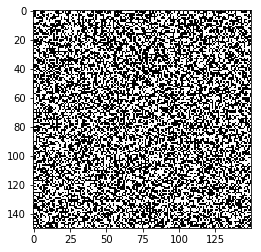

In [13]:
S = np.random.choice([1,-1],size=[L,L])
plt.imshow(S,cmap='Greys')
plt.show()

### Run the Metropolitan algorithm given different cooling temperatures

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
ims = []

for m in np.linspace(1.5,0.1,50):
    #iterate the Metropolitan model as the temperature of the system cools
    S = metropolis(S,m*Tc)
    
    #calculate magnetization of the system for each temperature step
    M = np.sum(S)/L
    
    #compile all the plots to animate
    im = ax.matshow(S, cmap='Greys', animated=True)
    ax.axis('off')
    t = ax.annotate("M = " + str(M), (1,0))
    ims.append([im,t])

plt.close()

### Animate each temperature step

In [15]:
ani = animation.ArtistAnimation(fig, ims, interval=100, blit=True,
                                repeat_delay=1000)
HTML(ani.to_jshtml(fps=5))